# Dataset Information



   Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.



| Variable | Description |
| --- | --- |
|Loan_ID	|Unique Loan ID|
|Gender	|Male/ Female|
|Married	|Applicant married (Y/N)|
|Dependents	|Number of dependents|
|Education	|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed	|Self employed (Y/N)|
|ApplicantIncome	|Applicant income|
|CoapplicantIncome	|Coapplicant income|
|LoanAmount	|Loan amount in thousands|
|Loan_Amount_Term	|Term of loan in months|
|Credit_History	|credit history meets guidelines|
|Property_Area	|Urban/ Semi Urban/ Rural|
|Loan_Status	|Loan approved (Y/N)|

In [1]:
import pandas as pd
import numpy as np
#Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import random
#Hyper Parameter tunning
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.model_selection import RandomizedSearchCV
#Data Transformation
from sklearn.preprocessing import StandardScaler,RobustScaler
#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'D:\data\aswintech\Machine-Learning-Projects-master\Loan Prediction Analysis - Classification\Loan Prediction Dataset.csv')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.drop('Loan_ID',axis=True,inplace=True)

In [8]:
for col in df.columns:
    print('---------',col,'-------------')
    print(df[col].value_counts())
    print('NULL VALUE :',df[col].isnull().sum())
    print()

--------- Gender -------------
Male      489
Female    112
Name: Gender, dtype: int64
NULL VALUE : 13

--------- Married -------------
Yes    398
No     213
Name: Married, dtype: int64
NULL VALUE : 3

--------- Dependents -------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
NULL VALUE : 15

--------- Education -------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
NULL VALUE : 0

--------- Self_Employed -------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
NULL VALUE : 32

--------- ApplicantIncome -------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
NULL VALUE : 0

--------- CoapplicantIncome -------------
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 2

# HANDEL MISSING VALUE

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df['Gender'].fillna(df.Gender.mode()[0],inplace=True)
df['Dependents'].fillna(df.Dependents.mode()[0],inplace=True)
df['Married'].fillna(df.Married.mode()[0],inplace=True)
df['Self_Employed'].fillna(df.Self_Employed.mode()[0],inplace=True)


In [12]:
df['LoanAmount'].fillna(df.LoanAmount.mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.median(),inplace=True)
df['Credit_History'].fillna(df.Credit_History.median(),inplace=True)

In [13]:
df['Dependents'].replace({'3+':3},inplace=True)

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EXPLOTARY DATA ANALYSIS

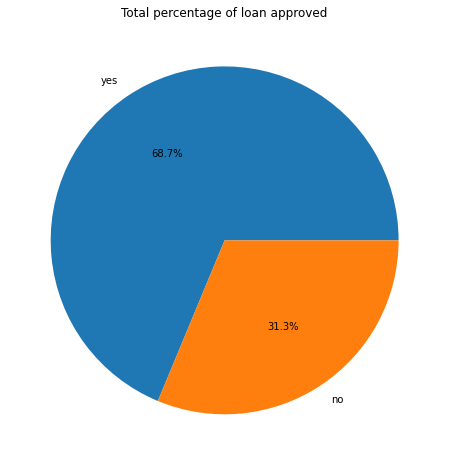

In [15]:
plt.figure(figsize=(8,8))
chart=df['Loan_Status'].value_counts()/df['Loan_Status'].value_counts().sum()
plt.pie(chart,labels=['yes','no'],autopct='%1.1f%%')
plt.title('Total percentage of loan approved')
plt.show()

In data has 68.7% of people get loan approved and 31.3% of people not get loan approved

In [16]:
Categorical_feature = [i for i in df.columns if len(df[i].unique()) < 10]
Categorical_feature

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

<AxesSubplot:xlabel='Gender', ylabel='count'>

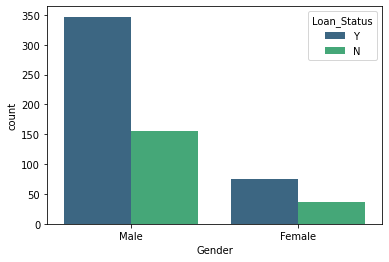

In [17]:
sns.countplot(df["Gender"],hue=df["Loan_Status"],palette="viridis")

mostly male applicants loan are approved

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

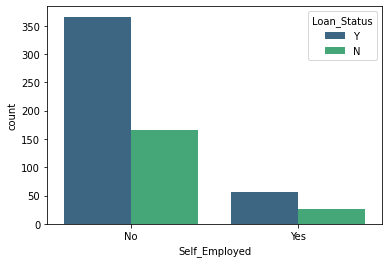

In [18]:
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"],palette="viridis")

the most fo the selfemployed application  rejected

<AxesSubplot:xlabel='Married', ylabel='count'>

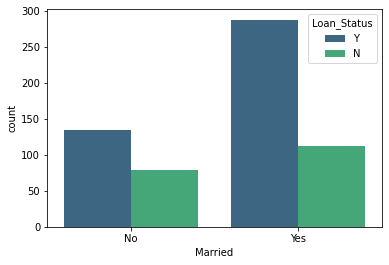

In [19]:
sns.countplot(df['Married'],hue=df['Loan_Status'],palette="viridis")

Married male applicants loans are approved

<AxesSubplot:xlabel='Dependents', ylabel='count'>

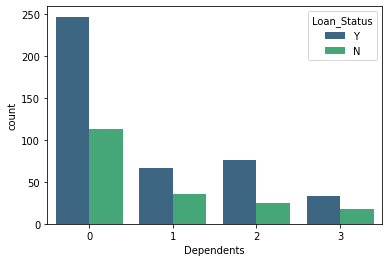

In [20]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'],palette="viridis")

mostly dependents is 0 are highly approved for loan

<AxesSubplot:xlabel='Education', ylabel='count'>

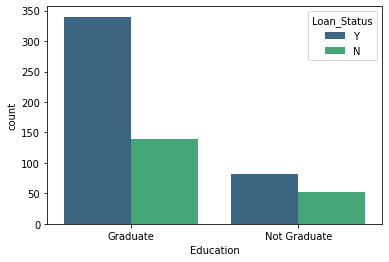

In [21]:
sns.countplot(df['Education'],hue=df['Loan_Status'],palette="viridis")

The Graduate people are get  loan than not graduate

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

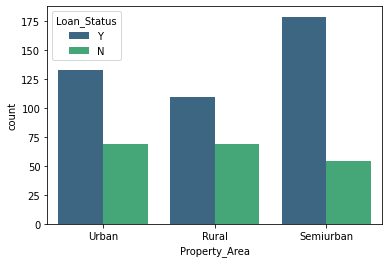

In [22]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette="viridis")

Propotion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

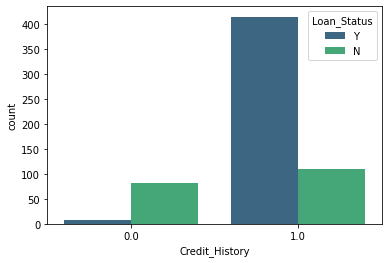

In [23]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'],palette="viridis")

highly people who follow he credit_histy guidence has approved for loan

In [24]:
numeric_feature=[i for i in df.columns if len(df[i].unique())>10  and df[i].dtype!='o']
numeric_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

<AxesSubplot:ylabel='ApplicantIncome'>

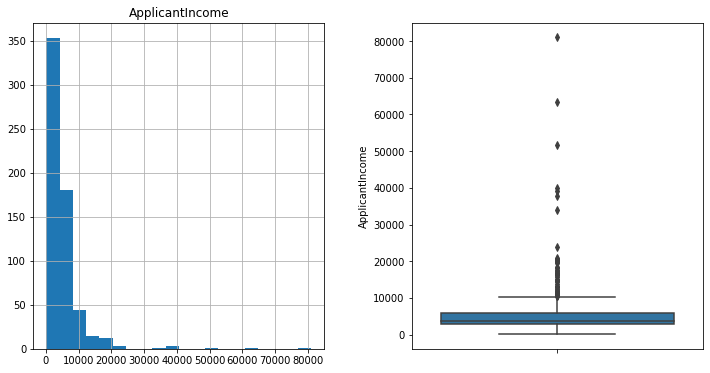

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['ApplicantIncome'].hist(bins=20)
plt.subplots_adjust(wspace = 0.3,hspace = 0.3)
plt.title('ApplicantIncome')
plt.subplot(1,2,2)
sns.boxplot(y=df['ApplicantIncome'])

It can be inferred that most of the data in Applicant income is towards left which means it is not normally distributed.
The boxplot confirms the presence of outliers.
This can be attributed to income disparity in the society.

We can see that there are higher number of graduates with very high incomes, which are appearing to be the outliers.

<AxesSubplot:ylabel='CoapplicantIncome'>

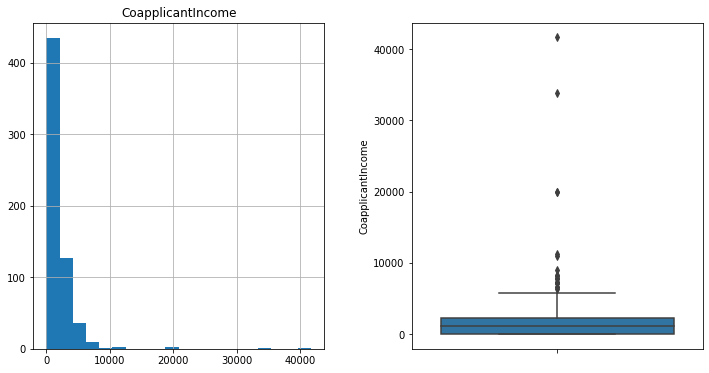

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['CoapplicantIncome'].hist(bins=20)
plt.subplots_adjust(wspace = 0.3,hspace = 0.3)
plt.title('CoapplicantIncome')
plt.subplot(1,2,2)
sns.boxplot(y=df['CoapplicantIncome'])

CoapplicantIncome is lesser than applicantIncome and is within the 5000–15000, again with some outliers.

<AxesSubplot:ylabel='LoanAmount'>

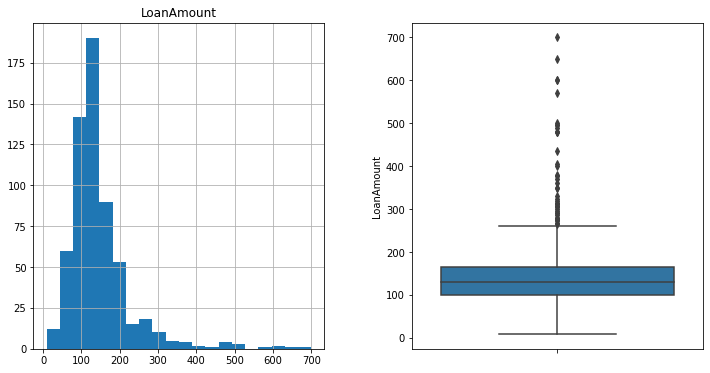

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['LoanAmount'].hist(bins=20)
plt.subplots_adjust(wspace = 0.3,hspace = 0.3)
plt.title('LoanAmount')
plt.subplot(1,2,2)
sns.boxplot(y=df['LoanAmount'])

It can be inferred that most of the data in loan amount is towards left which means it is not normally distributed. The boxplot confirms the presence of outliers.

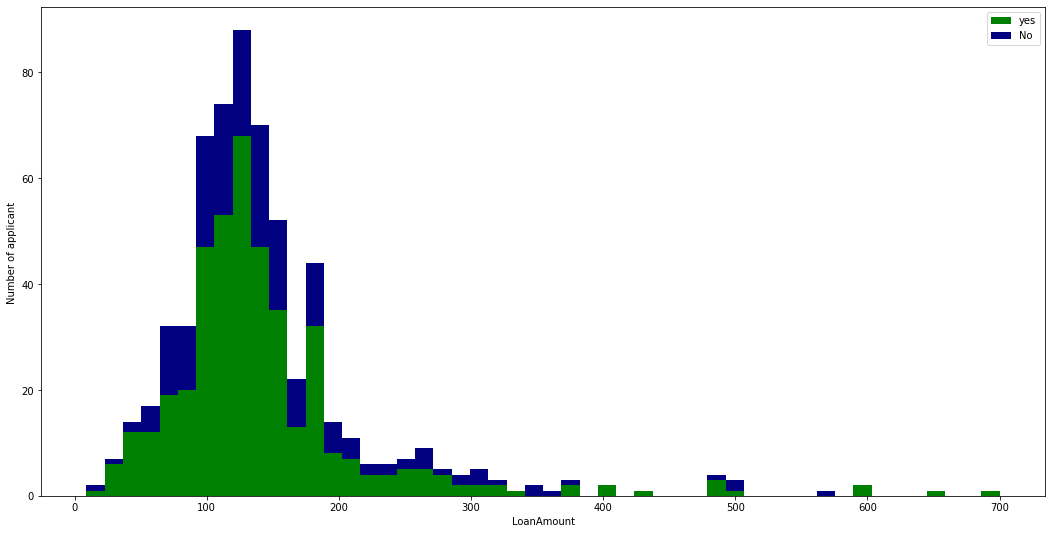

In [28]:
figure = plt.figure(figsize=(18, 9))
plt.hist([df[df['Loan_Status'] == 'Y']['LoanAmount'], df[df['Loan_Status'] == 'N']['LoanAmount']], 
         stacked=True, color = ["green","navy"],
         bins = 50, label = ['yes','No '])
plt.xlabel('LoanAmount')
plt.ylabel('Number of applicant ')
plt.legend();

Due to outliers in the Loan Amount. the data in the loan amount is skewed towards the right, which means bulk of the data is towards the left. We remove this skewness by doing a log transformation. A log transformation doesn't effect affect the smaller values much but reduces the larger values. So the distribution becomes normal

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

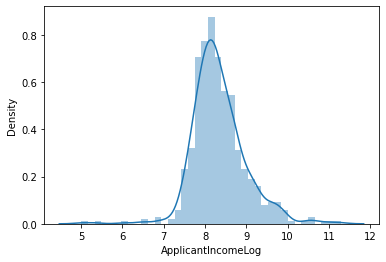

In [29]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

after take log the applicantincome are normally distribute

# create new columns

In [30]:
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,total_income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,6000.0


In [32]:
df['Loan_Status']=df['Loan_Status'].map({'Y':0,'N':1})

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,total_income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0,8.674026,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1,8.430109,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0,8.006368,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0,7.856707,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0,8.699515,6000.0


<AxesSubplot:xlabel='CoapplicantIncome_log', ylabel='Density'>

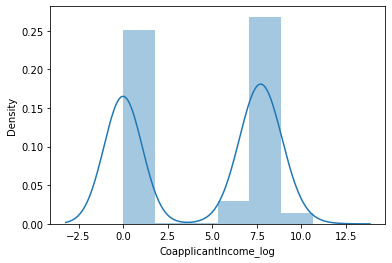

In [34]:
df['CoapplicantIncome_log']=np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncome_log'])

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

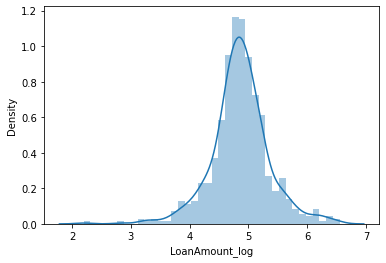

In [35]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_log'])

<AxesSubplot:xlabel='Loan_Amount_Term_log', ylabel='Density'>

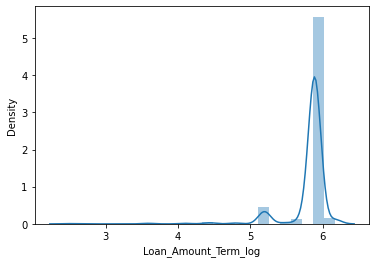

In [36]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_log'])

<AxesSubplot:xlabel='total_income_log', ylabel='Density'>

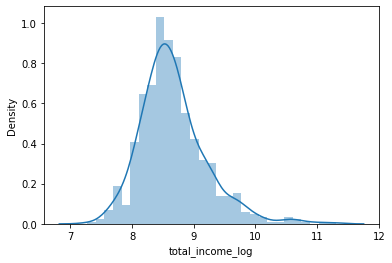

In [37]:
df['total_income_log']=np.log(df['total_income'])
sns.distplot(df['total_income_log'])

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,total_income,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,total_income_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0,8.674026,5849.0,0.000000,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1,8.430109,6091.0,7.319202,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0,8.006368,3000.0,0.000000,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0,7.856707,4941.0,7.765993,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0,8.699515,6000.0,0.000000,4.948760,5.886104,8.699515


# one hot encoding

In [39]:
col=df[['Gender','Married','Education','Self_Employed','Property_Area']]

In [40]:
encode=pd.get_dummies(col)

In [41]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,total_income,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,total_income_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0,8.674026,5849.0,0.000000,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1,8.430109,6091.0,7.319202,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0,8.006368,3000.0,0.000000,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0,7.856707,4941.0,7.765993,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0,8.699515,6000.0,0.000000,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,0,7.972466,2900.0,0.000000,4.262680,5.886104,7.972466
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,0,8.320205,4106.0,0.000000,3.688879,5.192957,8.320205
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,0,8.996157,8312.0,5.484797,5.533389,5.886104,9.025456
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,0,8.933664,7583.0,0.000000,5.231109,5.886104,8.933664


In [42]:
encode

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,1,0,1,0,0
610,0,1,0,1,1,0,1,0,1,0,0
611,0,1,0,1,1,0,1,0,0,0,1
612,0,1,0,1,1,0,1,0,0,0,1


In [43]:
df_train=pd.merge(df,encode,how='outer',right_on=None,left_index=True, right_index=True)

In [44]:
df=df_train

In [45]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,...,1,1,0,1,0,1,0,0,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,...,1,0,1,1,0,1,0,1,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,...,1,0,1,1,0,0,1,0,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,...,1,0,1,0,1,1,0,0,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,...,0,1,0,1,0,1,0,1,0,0
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,...,1,0,1,1,0,1,0,1,0,0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,...,1,0,1,1,0,1,0,0,0,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,...,1,0,1,1,0,1,0,0,0,1


# Correlation Matrix

In [46]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncomeLog,total_income,CoapplicantIncome_log,LoanAmount_log,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615,0.004710,0.790532,0.893037,-0.250433,0.434849,...,0.058809,-0.051708,0.051708,0.140760,-0.140760,-0.127180,0.127180,0.015829,-0.014246,-0.000598
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.059187,-0.237900,0.342781,0.573648,0.204179,...,0.082912,-0.075948,0.075948,0.062290,-0.062290,0.016100,-0.016100,0.005329,-0.027044,0.022776
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431,0.036416,0.551556,0.620102,0.047522,0.895324,...,0.107930,-0.147141,0.147141,0.166998,-0.166998,-0.115260,0.115260,0.043178,-0.008273,-0.033220
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705,0.022549,-0.031731,-0.070917,0.014784,0.084616,...,-0.074030,0.100912,-0.100912,0.073928,-0.073928,0.033739,-0.033739,0.034321,0.059141,-0.094279
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000,-0.540556,0.013468,-0.012563,0.008274,-0.019542,...,0.009170,-0.010938,0.010938,0.073658,-0.073658,0.001550,-0.001550,-0.020906,0.035976,-0.016934
Loan_Status,0.004710,0.059187,0.036416,0.022549,-0.540556,1.000000,-0.010977,0.031271,-0.060593,0.041874,...,-0.017987,0.091478,-0.091478,-0.085884,0.085884,-0.003700,0.003700,0.100694,-0.136540,0.043621
ApplicantIncomeLog,0.790532,-0.237900,0.551556,-0.031731,0.013468,-0.010977,1.000000,0.639953,-0.368244,0.491066,...,0.084514,-0.021424,0.021424,0.181713,-0.181713,-0.189821,0.189821,0.022500,0.005662,-0.027612
total_income,0.893037,0.342781,0.620102,-0.070917,-0.012563,0.031271,0.639953,1.000000,0.023028,0.503817,...,0.093191,-0.083319,0.083319,0.161362,-0.161362,-0.113000,0.113000,0.017387,-0.025728,0.009754
CoapplicantIncome_log,-0.250433,0.573648,0.047522,0.014784,0.008274,-0.060593,-0.368244,0.023028,1.000000,0.130989,...,0.220579,-0.317095,0.317095,-0.043127,0.043127,0.092308,-0.092308,0.057497,-0.018217,-0.036800
LoanAmount_log,0.434849,0.204179,0.895324,0.084616,-0.019542,0.041874,0.491066,0.503817,0.130989,1.000000,...,0.144378,-0.180178,0.180178,0.143367,-0.143367,-0.109629,0.109629,0.078120,0.004144,-0.079843


<AxesSubplot:>

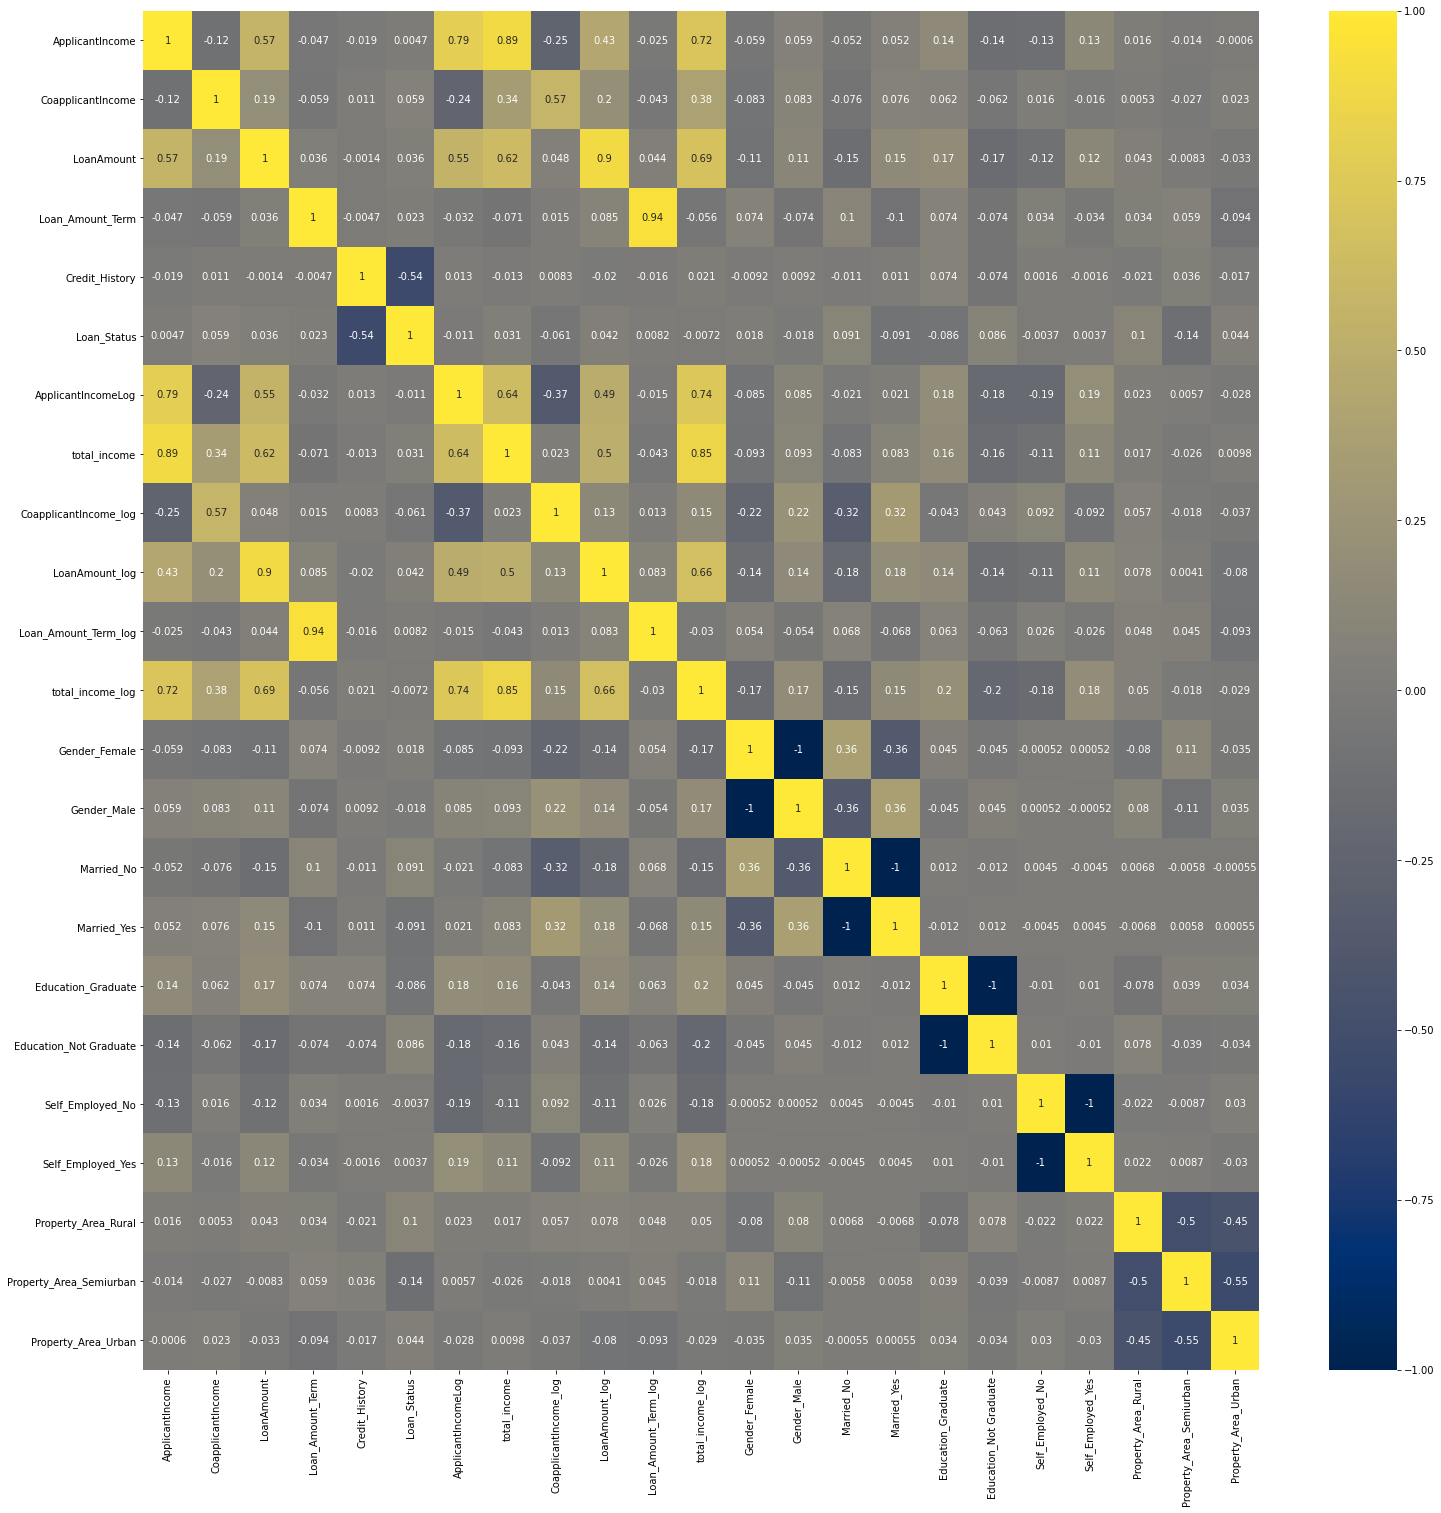

In [47]:
plt.figure(figsize=(25,25))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='cividis')

In [48]:
cols=['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "total_income",  'CoapplicantIncome_log']

In [49]:
df=df.drop(columns=cols,axis=1)

In [50]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmount_log,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,1.0,Urban,0,8.674026,4.986426,...,1,1,0,1,0,1,0,0,0,1
1,Male,Yes,1,Graduate,No,1.0,Rural,1,8.430109,4.852030,...,1,0,1,1,0,1,0,1,0,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,0,8.006368,4.189655,...,1,0,1,1,0,0,1,0,0,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,0,7.856707,4.787492,...,1,0,1,0,1,1,0,0,0,1
4,Male,No,0,Graduate,No,1.0,Urban,0,8.699515,4.948760,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,0,7.972466,4.262680,...,0,1,0,1,0,1,0,1,0,0
610,Male,Yes,3,Graduate,No,1.0,Rural,0,8.320205,3.688879,...,1,0,1,1,0,1,0,1,0,0
611,Male,Yes,1,Graduate,No,1.0,Urban,0,8.996157,5.533389,...,1,0,1,1,0,1,0,0,0,1
612,Male,Yes,2,Graduate,No,1.0,Urban,0,8.933664,5.231109,...,1,0,1,1,0,1,0,0,0,1


In [51]:
df=df.drop(df[['Gender','Married','Education','Self_Employed','Property_Area']],axis=1)

In [52]:
df

,Dependents,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmount_log,Loan_Amount_Term_log,total_income_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1.0,0,8.674026,4.986426,5.886104,8.674026,0,1,1,0,1,0,1,0,0,0,1
1,1,1.0,1,8.430109,4.852030,5.886104,8.714568,0,1,0,1,1,0,1,0,1,0,0
2,0,1.0,0,8.006368,4.189655,5.886104,8.006368,0,1,0,1,1,0,0,1,0,0,1
3,0,1.0,0,7.856707,4.787492,5.886104,8.505323,0,1,0,1,0,1,1,0,0,0,1
4,0,1.0,0,8.699515,4.948760,5.886104,8.699515,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1.0,0,7.972466,4.262680,5.886104,7.972466,1,0,1,0,1,0,1,0,1,0,0
610,3,1.0,0,8.320205,3.688879,5.192957,8.320205,0,1,0,1,1,0,1,0,1,0,0
611,1,1.0,0,8.996157,5.533389,5.886104,9.025456,0,1,0,1,1,0,1,0,0,0,1
612,2,1.0,0,8.933664,5.231109,5.886104,8.933664,0,1,0,1,1,0,1,0,0,0,1


# TRAIN_TEST_SPLIT

In [53]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [54]:
feature_selec_model = RandomForestClassifier(n_estimators=60, max_features='sqrt')
feature_selec_model.fit(x,y)
print(feature_selec_model.feature_importances_)

[0.04236662 0.25180774 0.16962497 0.1615878  0.03958178 0.18420645
 0.01105798 0.01243079 0.0144193  0.01239714 0.01434463 0.01314919
 0.01179312 0.01209423 0.01641444 0.02051321 0.01221061]


In [55]:
feature_imp = pd.DataFrame(feature_selec_model.feature_importances_,columns=["importance"])
feature_imp["features"]  = x.columns
feature_imp.set_index("features",inplace=True)
feature_imp.sort_values(by="importance",ascending=True,inplace=True)

In [56]:
feature_imp

,importance
features,
Gender_Female,0.011058
Self_Employed_No,0.011793
Self_Employed_Yes,0.012094
Property_Area_Urban,0.012211
Married_Yes,0.012397
Gender_Male,0.012431
Education_Not Graduate,0.013149
Education_Graduate,0.014345
Married_No,0.014419


<BarContainer object of 17 artists>

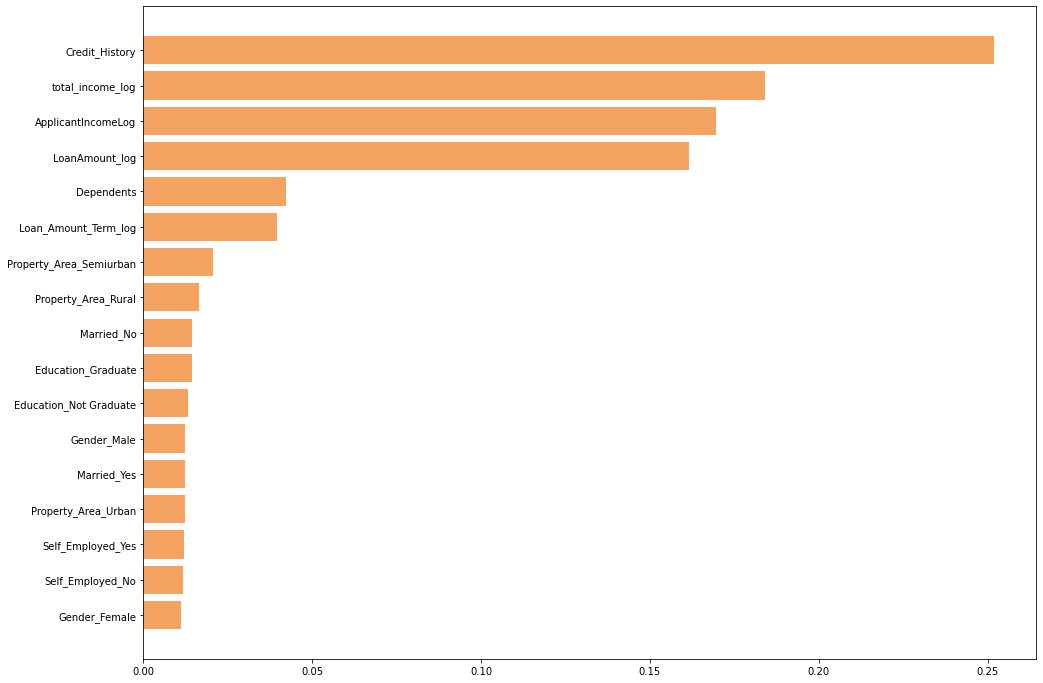

In [57]:
plt.figure(figsize=(16,12))
plt.barh(feature_imp.index,feature_imp["importance"],color="sandybrown")

In [58]:
top_Feature = feature_imp[7:].index
top_Feature

Index(['Education_Graduate', 'Married_No', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Loan_Amount_Term_log', 'Dependents',
       'LoanAmount_log', 'ApplicantIncomeLog', 'total_income_log',
       'Credit_History'],
      dtype='object', name='features')

In [59]:
x=df[top_Feature]

In [60]:
x.shape

(614, 10)

In [61]:
y.shape

(614,)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((429, 10), (185, 10), (429,), (185,))

In [65]:
y_test.value_counts()

0    120
1     65
Name: Loan_Status, dtype: int64

In [66]:
y_train.value_counts()

0    302
1    127
Name: Loan_Status, dtype: int64

# MODEL SELECTION

In [67]:
Training_Accuracy_Score = []
Testing_Accuracy_Score =[]
Training_F1_Score = []
Testing_F1_Score = []
Training_Precision =[]
Testing_Precision = []
Training_Recall = []
Testing_Recall = []
Model = []
cros_val_scr = []

In [68]:

def prediction(x_train,x_test,y_train,y_test,model,algo):        
        print(f"Predictions for {algo} Algorithem")
        Model.append(algo)        
        print("Train Results: ")
        print("================")
        pre = model.predict(x_train)
        print("        Training Accuracy Score   : {:.2f} %".format((metrics.accuracy_score(y_train,pre))*100))
        print("")
        print("        Training F1 Score         : {:.4f} ".format((metrics.f1_score(y_train,pre,average="macro"))))
        print("")       
        print("        Training Precision        : {:.4f} ".format((metrics.precision_score(y_train,pre,average="macro"))))
        print("")
        print("        Training Recall           : {:.4f} ".format((metrics.recall_score(y_train,pre,average="macro"))))
        print()
        print(f"       Training Classification Report  :    ")
        print('--------------------------------------------------')
        print(f" {metrics.classification_report(y_train,pre)}")
        print("")
        print("")
        print("Test Results: ")
        print("================")
        pre_t = model.predict(x_test)
        print("        Testing Accuracy Score    : {:.2f} %".format((metrics.accuracy_score(y_test,pre_t))*100))
        print("")        
        print("        Testing F1 Score          : {:.4f} ".format((metrics.f1_score(y_test,pre_t,average="macro"))))
        print("")        
        print("        Testing Precision         : {:.4f} ".format((metrics.precision_score(y_test,pre_t,average="macro"))))
        print("")
        print("        Testing Recall            : {:.4f} ".format((metrics.recall_score(y_test,pre_t,average="macro"))))
        print()
        print(f"        Testing Classification Report  :  ")
        print(f" {metrics.classification_report(y_test,pre_t)}")        
        Training_Accuracy_Score.append(round((metrics.accuracy_score(y_train,pre)*100),2))
        Testing_Accuracy_Score.append(round((metrics.accuracy_score(y_test,pre_t)*100),2))
        Training_F1_Score.append(round((metrics.f1_score(y_train,pre,average="macro")),3))
        Testing_F1_Score.append(round((metrics.f1_score(y_test,pre_t,average="macro")),3))
        Training_Precision.append(round((metrics.precision_score(y_train,pre,average="macro")),3))
        Testing_Precision.append(round((metrics.precision_score(y_test,pre_t,average="macro")),3))
        Training_Recall.append(round((metrics.recall_score(y_train,pre,average="macro")),3))
        Testing_Recall.append(round((metrics.recall_score(y_test,pre_t,average="macro")),3))

In [69]:
def cvs(x,y,model,algo):
    cv = cross_val_score(model,x,y,cv=5)
    print(f"Cross validation Score for {algo} : {round(cv.mean()*100,2)} %")
    cros_val_scr.append(round((cv.mean()*100),2))

In [70]:
colorm = ["YlOrRd","BuPu","PuBu","YlGn","RdBu"]
import random as ran
def con_mat(x_test,y_test,model,algo):
    print(f"Confusion matrix for {algo} Algorithem")
    pre_t = model.predict(x_test)
    cm_lr = metrics.confusion_matrix(y_test,pre_t)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm_lr,cmap=ran.choice(colorm),annot=True,cbar=True, fmt=".0f",annot_kws={"size": 20})

# DECISION TREE CLASSIFIER

In [71]:
dtc = DecisionTreeClassifier(random_state=42)
algo = "Decision Tree Classifier"
model = dtc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)



Predictions for Decision Tree Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 100.00 %

        Training F1 Score         : 1.0000 

        Training Precision        : 1.0000 

        Training Recall           : 1.0000 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       127

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



Test Results: 
        Testing Accuracy Score    : 71.35 %

        Testing F1 Score          : 0.6688 

        Testing Precision         : 0.6836 

        Testing Recall            : 0.6628 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.75      0.

In [72]:
cvs(x,y,model,algo)

Cross validation Score for Decision Tree Classifier : 70.84 %


Confusion matrix for Decision Tree Classifier Algorithem


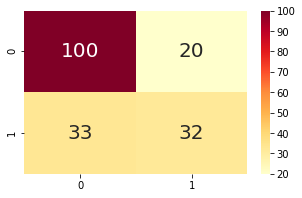

In [73]:
con_mat(x_test,y_test,model,algo)

# LOGISTIC REGRESSION

In [74]:
rbs = RobustScaler()  # Data transformation helps to improve logistic regression accuracy 
x_train_r = rbs.fit_transform(x_train)
y_train_r = y_train
x_test_r = rbs.fit_transform(x_test)
y_test_r = y_test
lg = LogisticRegression()
algo = "Logistic Regression"
model = lg.fit(x_train_r,y_train_r)
prediction(x_train_r,x_test_r,y_train_r,y_test_r,model,algo)

Predictions for Logistic Regression Algorithem
Train Results: 
        Training Accuracy Score   : 82.05 %

        Training F1 Score         : 0.7367 

        Training Precision        : 0.8608 

        Training Recall           : 0.7083 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.80      0.98      0.89       302
           1       0.92      0.43      0.59       127

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429



Test Results: 
        Testing Accuracy Score    : 78.38 %

        Testing F1 Score          : 0.7148 

        Testing Precision         : 0.8437 

        Testing Recall            : 0.6994 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0.98    

In [75]:
cvs(x,y,model,algo)

Cross validation Score for Logistic Regression : 80.95 %


Confusion matrix for Logistic Regression Algorithem


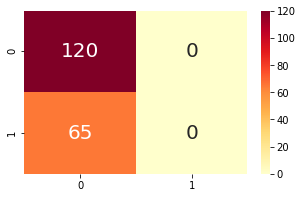

In [76]:
con_mat(x_test,y_test,model,algo)

# Support Vector Classifier

In [77]:
svc = SVC()
algo = "Support Vector Classifier"
model = svc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Support Vector Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 70.40 %

        Training F1 Score         : 0.4131 

        Training Precision        : 0.3520 

        Training Recall           : 0.5000 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.70      1.00      0.83       302
           1       0.00      0.00      0.00       127

    accuracy                           0.70       429
   macro avg       0.35      0.50      0.41       429
weighted avg       0.50      0.70      0.58       429



Test Results: 
        Testing Accuracy Score    : 64.86 %

        Testing F1 Score          : 0.3934 

        Testing Precision         : 0.3243 

        Testing Recall            : 0.5000 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.65      1.

In [78]:
cvs(x,y,model,algo)

Cross validation Score for Support Vector Classifier : 77.04 %


Confusion matrix for Support Vector Classifier Algorithem


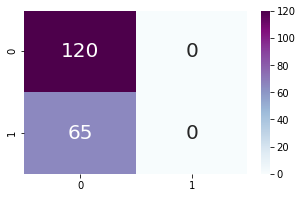

In [79]:
con_mat(x_test,y_test,model,algo)

# KNeighborsClassifier

In [80]:

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

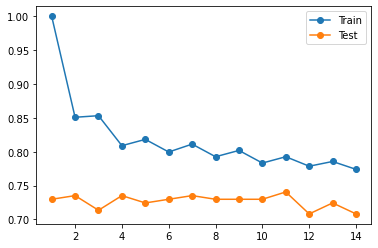

In [81]:
plt.plot(range(1,15),train_scores,label="Train",marker="o")
plt.plot(range(1,15),test_scores,label="Test",marker="o")
plt.legend()

In [82]:

knn = KNeighborsClassifier(n_neighbors=12)
algo = "K-Nearest Neighbor"
model = knn.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for K-Nearest Neighbor Algorithem
Train Results: 
        Training Accuracy Score   : 77.86 %

        Training F1 Score         : 0.6333 

        Training Precision        : 0.8804 

        Training Recall           : 0.6260 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       302
           1       1.00      0.25      0.40       127

    accuracy                           0.78       429
   macro avg       0.88      0.63      0.63       429
weighted avg       0.83      0.78      0.73       429



Test Results: 
        Testing Accuracy Score    : 70.81 %

        Testing F1 Score          : 0.5529 

        Testing Precision         : 0.8448 

        Testing Recall            : 0.5846 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.69      1.00     

In [83]:
cvs(x,y,model,algo)

Cross validation Score for K-Nearest Neighbor : 76.55 %


Confusion matrix for K-Nearest Neighbor Algorithem


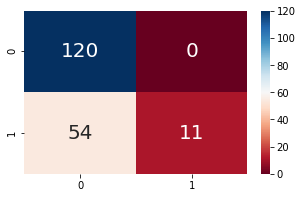

In [84]:
con_mat(x_test,y_test,model,algo)

# GaussianNB

In [85]:

gnb = GaussianNB()
algo = "Gaussian Naive Bays"
model = gnb.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Gaussian Naive Bays Algorithem
Train Results: 
        Training Accuracy Score   : 82.52 %

        Training F1 Score         : 0.7493 

        Training Precision        : 0.8533 

        Training Recall           : 0.7207 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       302
           1       0.89      0.46      0.61       127

    accuracy                           0.83       429
   macro avg       0.85      0.72      0.75       429
weighted avg       0.84      0.83      0.81       429



Test Results: 
        Testing Accuracy Score    : 77.84 %

        Testing F1 Score          : 0.7136 

        Testing Precision         : 0.8166 

        Testing Recall            : 0.6987 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0.97    

In [86]:
cvs(x,y,model,algo)

Cross validation Score for Gaussian Naive Bays : 80.3 %


Confusion matrix for Gaussian Naive Bays Algorithem


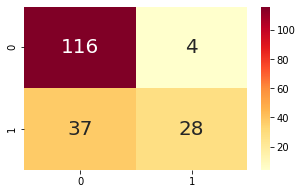

In [87]:
con_mat(x_test,y_test,model,algo)

# RandomForestClassifier

In [88]:
rfc = RandomForestClassifier(random_state=42)
algo = "Random Forest Classifier"
model = rfc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Random Forest Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 100.00 %

        Training F1 Score         : 1.0000 

        Training Precision        : 1.0000 

        Training Recall           : 1.0000 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       127

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



Test Results: 
        Testing Accuracy Score    : 79.46 %

        Testing F1 Score          : 0.7459 

        Testing Precision         : 0.8135 

        Testing Recall            : 0.7288 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.78      0.

In [89]:
cvs(x,y,model,algo)

Cross validation Score for Random Forest Classifier : 78.83 %


Confusion matrix for Random Forest Classifier Algorithem


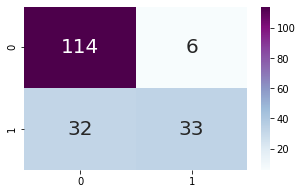

In [90]:
con_mat(x_test,y_test,model,algo)

# ADABoostClassifier

In [91]:

abc = AdaBoostClassifier(random_state=0)
algo = "Ada Boost Classifier"
model = abc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Ada Boost Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 85.55 %

        Training F1 Score         : 0.8070 

        Training Precision        : 0.8622 

        Training Recall           : 0.7810 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       302
           1       0.87      0.60      0.71       127

    accuracy                           0.86       429
   macro avg       0.86      0.78      0.81       429
weighted avg       0.86      0.86      0.85       429



Test Results: 
        Testing Accuracy Score    : 77.30 %

        Testing F1 Score          : 0.7158 

        Testing Precision         : 0.7872 

        Testing Recall            : 0.7016 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0.94   

In [92]:
cvs(x,y,model,algo)

Cross validation Score for Ada Boost Classifier : 79.48 %


Confusion matrix for Ada Boost Classifier Algorithem


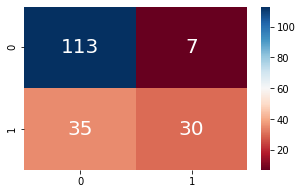

In [93]:
con_mat(x_test,y_test,model,algo)

# GradientBoostingClassifier

In [94]:
gbc=GradientBoostingClassifier(random_state=42)
algo='GradientBoostingClassifier'
model=gbc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for GradientBoostingClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 93.01 %

        Training F1 Score         : 0.9094 

        Training Precision        : 0.9548 

        Training Recall           : 0.8819 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       302
           1       1.00      0.76      0.87       127

    accuracy                           0.93       429
   macro avg       0.95      0.88      0.91       429
weighted avg       0.94      0.93      0.93       429



Test Results: 
        Testing Accuracy Score    : 76.22 %

        Testing F1 Score          : 0.7058 

        Testing Precision         : 0.7648 

        Testing Recall            : 0.6933 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0

In [95]:
cvs(x,y,model,algo)

Cross validation Score for GradientBoostingClassifier : 77.7 %


Confusion matrix for GradientBoostingClassifier Algorithem


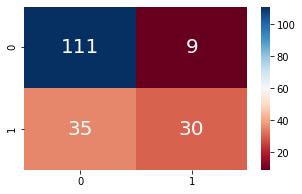

In [96]:
con_mat(x_test,y_test,model,algo)

# ExtraTreeClassifier

In [97]:
etc=ExtraTreesClassifier()
algo='ExtraTreesClassifier'
model=etc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 100.00 %

        Training F1 Score         : 1.0000 

        Training Precision        : 1.0000 

        Training Recall           : 1.0000 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       127

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



Test Results: 
        Testing Accuracy Score    : 75.14 %

        Testing F1 Score          : 0.7024 

        Testing Precision         : 0.7377 

        Testing Recall            : 0.6920 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0.89  

In [98]:
cvs(x,y,model,algo)

Cross validation Score for ExtraTreesClassifier : 77.36 %


Confusion matrix for ExtraTreesClassifier Algorithem


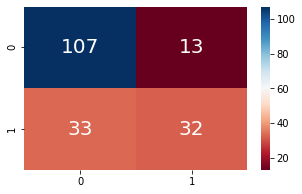

In [99]:
con_mat(x_test,y_test,model,algo)

# CREATE NEW TABLE WITH METRICS

In [100]:
results = {"Model":Model,"Training_Accuracy_Score":Training_Accuracy_Score,"Testing_Accuracy_Score":Testing_Accuracy_Score,"Training_F1_Score":Training_F1_Score,
           "Testing_F1_Score":Testing_F1_Score,"Training_Precision":Training_Precision,"Testing_Precision":Testing_Precision,"Training_Recall":Training_Recall,
           "Testing_Recall":Testing_Recall,"cros_val_scr":cros_val_scr}

df1 = pd.concat([pd.Series(v,name=k) for k,v in results.items()],axis=1)
df1.set_index("Model",inplace=True)
df1

,Training_Accuracy_Score,Testing_Accuracy_Score,Training_F1_Score,Testing_F1_Score,Training_Precision,Testing_Precision,Training_Recall,Testing_Recall,cros_val_scr
Model,,,,,,,,,
Decision Tree Classifier,100.00,71.35,1.000,0.669,1.000,0.684,1.000,0.663,70.84
Logistic Regression,82.05,78.38,0.737,0.715,0.861,0.844,0.708,0.699,80.95
Support Vector Classifier,70.40,64.86,0.413,0.393,0.352,0.324,0.500,0.500,77.04
K-Nearest Neighbor,77.86,70.81,0.633,0.553,0.880,0.845,0.626,0.585,76.55
Gaussian Naive Bays,82.52,77.84,0.749,0.714,0.853,0.817,0.721,0.699,80.30
Random Forest Classifier,100.00,79.46,1.000,0.746,1.000,0.813,1.000,0.729,78.83
Ada Boost Classifier,85.55,77.30,0.807,0.716,0.862,0.787,0.781,0.702,79.48
GradientBoostingClassifier,93.01,76.22,0.909,0.706,0.955,0.765,0.882,0.693,77.70
ExtraTreesClassifier,100.00,75.14,1.000,0.702,1.000,0.738,1.000,0.692,77.36


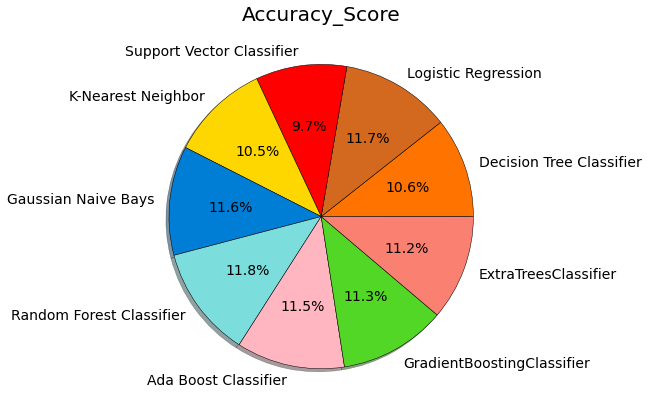

In [101]:
res = []
for i in Testing_Accuracy_Score:
    val = round(i/np.sum(Testing_Accuracy_Score),4)
    res.append(val)

label = [i for i in Model]
color = ["#FF7300","chocolate","#FF0000","gold","#007ED6","#7CDDDD","lightpink","#52D726","salmon"]
plt.figure(figsize=(12,7))
plt.style.use("fivethirtyeight")

plt.pie(res,labels=label,autopct="%1.1f%%",explode=None,colors=color,shadow=True,wedgeprops={"edgecolor":"black"})
plt.title("Accuracy_Score")
plt.show()

# HYPERPARAMETER TUNNING FOR RANDOMFOREST CLASSIFIER

In [102]:
rfc =RandomForestClassifier (random_state=42)
parameters = {'n_estimators':[80,90,100,120],'min_samples_split':[2,3,4],
              'max_depth':[3,5,8,10],"max_features" : ['sqrt', 'log2'],
              'min_samples_leaf': [1,2,3]}
rs = RandomizedSearchCV(rfc,parameters,cv=5,n_jobs=-1)
rs.fit(x_train, y_train)
print ("r2 / variance : ", rs.best_score_)

r2 / variance :  0.8228180574555404


In [103]:
algo = "RandomForestClassifier "
prediction(x_train,x_test,y_train,y_test,rs,algo)

Predictions for RandomForestClassifier  Algorithem
Train Results: 
        Training Accuracy Score   : 83.92 %

        Training F1 Score         : 0.7676 

        Training Precision        : 0.8862 

        Training Recall           : 0.7352 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       302
           1       0.95      0.48      0.64       127

    accuracy                           0.84       429
   macro avg       0.89      0.74      0.77       429
weighted avg       0.86      0.84      0.82       429



Test Results: 
        Testing Accuracy Score    : 78.92 %

        Testing F1 Score          : 0.7238 

        Testing Precision         : 0.8473 

        Testing Recall            : 0.7071 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0.98

In [104]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 5}

Confusion matrix for RandomForestClassifier  Algorithem


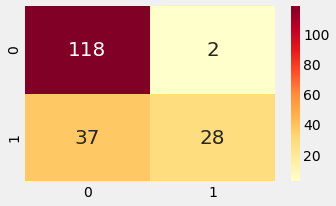

In [105]:
con_mat(x_test,y_test,rs,algo)

In [122]:
rfc =RandomForestClassifier (random_state=42)
parameters = {'n_estimators':[90,100,110],'min_samples_split':[3,4,5],
              'max_depth':[4,5,6],"max_features" : [ 'log2'],
              'min_samples_leaf': [1]}
gridrs = RandomizedSearchCV(rfc,parameters,cv=5,n_jobs=-1)
gridrs.fit(x_train, y_train)
print ("r2 / variance : ", gridrs.best_score_)

r2 / variance :  0.8228180574555404


In [121]:
prediction(x_train,x_test,y_train,y_test,gridrs,algo)

Predictions for LogisticRegression  Algorithem
Train Results: 
        Training Accuracy Score   : 83.92 %

        Training F1 Score         : 0.7676 

        Training Precision        : 0.8862 

        Training Recall           : 0.7352 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       302
           1       0.95      0.48      0.64       127

    accuracy                           0.84       429
   macro avg       0.89      0.74      0.77       429
weighted avg       0.86      0.84      0.82       429



Test Results: 
        Testing Accuracy Score    : 78.92 %

        Testing F1 Score          : 0.7238 

        Testing Precision         : 0.8473 

        Testing Recall            : 0.7071 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0.98    

# HYPER PARAMETER TUNNING FOR LOGISTIC REGRESSION

In [107]:
lg=LogisticRegression()
parameter = { 'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
    
gridlg=GridSearchCV(lg,parameter,cv=5,n_jobs=-1)
gridlg.fit(x_train,y_train)
print('r2/variance :',gridlg.best_score_)

r2/variance : 0.8204651162790698


In [108]:
algo = "LogisticRegression "
prediction(x_train,x_test,y_train,y_test,gridlg,algo)

Predictions for LogisticRegression  Algorithem
Train Results: 
        Training Accuracy Score   : 82.05 %

        Training F1 Score         : 0.7367 

        Training Precision        : 0.8608 

        Training Recall           : 0.7083 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.80      0.98      0.89       302
           1       0.92      0.43      0.59       127

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429



Test Results: 
        Testing Accuracy Score    : 78.38 %

        Testing F1 Score          : 0.7148 

        Testing Precision         : 0.8437 

        Testing Recall            : 0.6994 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0.98    

In [109]:
gridlg.best_params_

{'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}

In [110]:
cvs(x,y,model,algo)

Cross validation Score for LogisticRegression  : 76.87 %


con_mat(x_test,y_test,gridlg,algo)

In [112]:
lg=LogisticRegression()
parameter = { 'penalty' : ['l1'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : [ 'liblinear']}
    
gridlg=GridSearchCV(lg,parameter,cv=5,n_jobs=-1)
gridlg.fit(x_train,y_train)
print('r2/variance :',gridlg.best_score_)

r2/variance : 0.8204651162790698


# conclusion

#  Logistic regression perform well